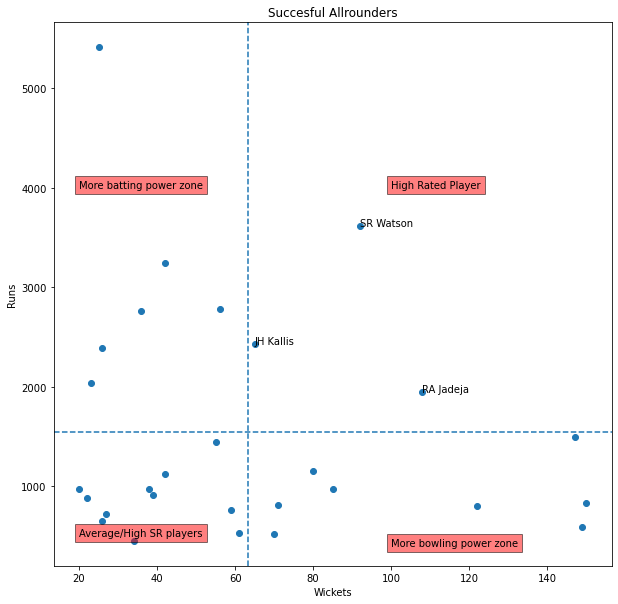

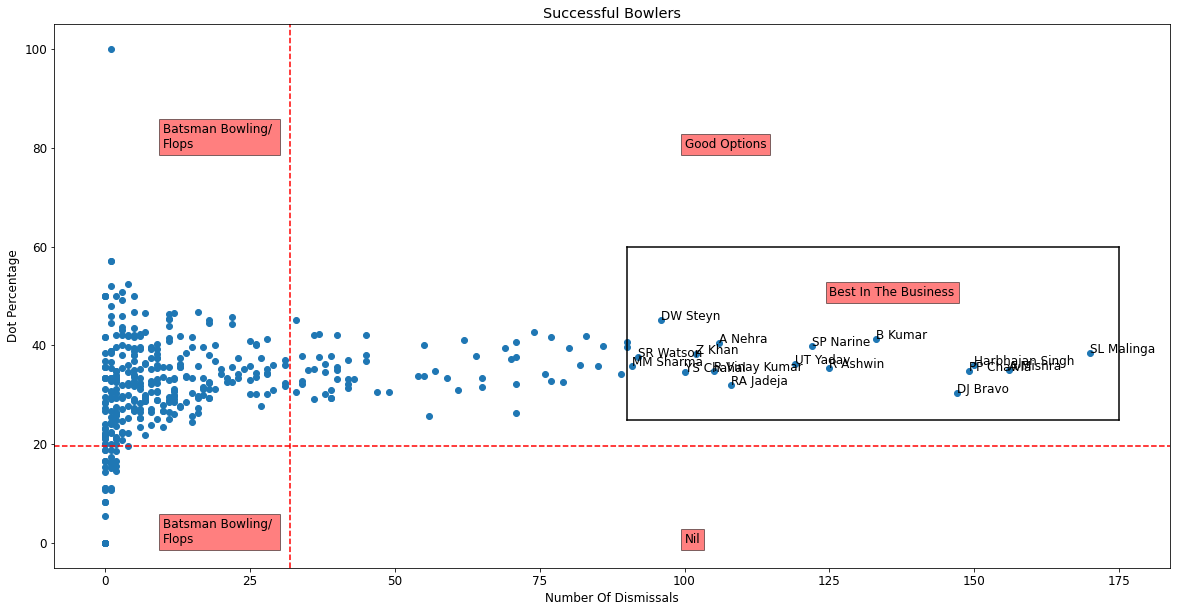

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
deliveries=pd.read_csv(r'C:\Users\aayush\Desktop\ipl\deliveries.csv')
matches=pd.read_csv(r'C:\Users\aayush\Desktop\ipl\matches.csv')
pd.set_option('max.columns',30)
deliveries['is_wicket']=deliveries['dismissal_kind'].fillna(0).apply(lambda x:0 if x==0 or x=='run out' or x=='retired hurt' or x=='obstructing the field' else 1)
deliveries['IsDot']=deliveries['total_runs'].apply(lambda x:1 if x==0 else 0)
deliveries['IsOne']=deliveries['total_runs'].apply(lambda x:1 if x==1 else 0)
deliveries['IsTwo']=deliveries['total_runs'].apply(lambda x:1 if x==2 else 0)
deliveries['IsThree']=deliveries['total_runs'].apply(lambda x:1 if x==3 else 0)
deliveries['IsFour']=deliveries['total_runs'].apply(lambda x:1 if x==4 else 0)
deliveries['IsFive']=deliveries['total_runs'].apply(lambda x:1 if x==5 else 0)
deliveries['IsSix']=deliveries['total_runs'].apply(lambda x:1 if x==6 else 0)
deliveries['bowling_team'].replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'],inplace=True)
deliveries['batting_team'].replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'],inplace=True)

#all_rounder_analysis
deliv_all_bat=pd.DataFrame(deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index())
deliv_all_bat['batsman_runs'].mean()
wicks=pd.DataFrame(deliveries.groupby('bowler')['is_wicket'].sum().reset_index().rename(columns={'bowler':'batsman'}))
all_round_bowl=wicks[wicks['is_wicket']>=wicks['is_wicket'].mean()]
deliv_all_bat_mean=deliv_all_bat[deliv_all_bat['batsman_runs']>=deliv_all_bat['batsman_runs'].mean()]
all_rounders=pd.merge(all_round_bowl,deliv_all_bat_mean,on='batsman',how='inner')
all_rounders.sort_values(by='is_wicket',ascending=False)
selected_players=[]
for x,y,z in zip(all_rounders['batsman'],all_rounders['is_wicket'],all_rounders['batsman_runs']):
    if (y>all_rounders['is_wicket'].mean())&(z>all_rounders['batsman_runs'].mean()):
        selected_players.append(x)
plt.figure(figsize=[10,10])
plt.axhline(all_rounders['batsman_runs'].mean(),ls='--')
plt.axvline(all_rounders['is_wicket'].mean(),ls='--')
annotations=list(all_rounders['batsman'])
for i,j in enumerate(annotations):
    if j in selected_players:
        plt.annotate(j,(all_rounders['is_wicket'][i],all_rounders['batsman_runs'][i]))
plt.scatter(all_rounders['is_wicket'],all_rounders['batsman_runs'])
plt.title('Succesful Allrounders')
plt.xlabel('Wickets')
plt.ylabel('Runs')
plt.text(20,4000,'More batting power zone',bbox=dict(facecolor='red', alpha=0.5))
plt.text(20,500,'Average/High SR players',bbox=dict(facecolor='red', alpha=0.5))
plt.text(100,400,'More bowling power zone',bbox=dict(facecolor='red', alpha=0.5))
plt.text(100,4000,'High Rated Player',bbox=dict(facecolor='red', alpha=0.5))
plt.show()
#bowler_analysis
bowler=pd.DataFrame(deliveries.groupby(['bowler'])['is_wicket'].sum().reset_index())
dot_ball=deliveries.groupby(['bowler'])['IsDot'].mean().reset_index()
dot_ball['Dot_Ball_Percentage']=dot_ball['IsDot'].apply(lambda x:x*100)
merged=pd.merge(bowler,dot_ball,on='bowler')
selected_bowlers=[]
for x,y,z in zip(merged['bowler'],merged['is_wicket'],merged['Dot_Ball_Percentage']):
    if (y>90)&(z>25):
        selected_bowlers.append(x)
annotations=list(merged['bowler'])
plt.rcParams.update({'font.size':12})
plt.figure(figsize=[20,10])
plt.scatter(merged['is_wicket'],merged['Dot_Ball_Percentage'])
plt.axhline(merged['is_wicket'].mean(),ls='--',c='red')
plt.axvline(merged['Dot_Ball_Percentage'].mean(),ls='--',c='red')
for i,j in enumerate(annotations):
    if j in selected_bowlers:
        plt.annotate(j,(merged['is_wicket'][i],merged['Dot_Ball_Percentage'][i]))
plt.title('Successful Bowlers')
plt.xlabel('Number Of Dismissals')
plt.ylabel('Dot Percentage')
plt.text(10,80,'Batsman Bowling/ \nFlops',bbox=dict(facecolor='red', alpha=0.5))
plt.text(100,80,'Good Options',bbox=dict(facecolor='red', alpha=0.5))
plt.text(100,0,'Nil',bbox=dict(facecolor='red', alpha=0.5))
plt.text(10,0,'Batsman Bowling/ \nFlops',bbox=dict(facecolor='red', alpha=0.5))
plt.plot([90,90],[60,25],color='black')
plt.plot([90,175],[60,60],color='black')
plt.plot([175,175],[60,25],color='black')
plt.plot([175,90],[25,25],color='black')
plt.text(125,50,'Best In The Business',bbox=dict(facecolor='red', alpha=0.5))
plt.show()
#batsman_analysis
batsman=deliveries.sort_values(['match_id','inning','over','ball'],ascending=True)
batsman=batsman[['match_id','batsman','inning','over','ball','batsman_runs','batting_team','bowling_team']]
batsman.to_excel('Batsman_Analysis.xlsx')
#Rest of batsman_analysis in Tableau
#team analysis
matches['team1'].replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'],inplace=True)
matches['team2'].replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'],inplace=True)
matches['winner'].replace(['Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Delhi Capitals'],inplace=True)
matches=matches[['season','city','team1','team2','venue','winner']]
matches.to_excel('matches.xlsx')
#Rest of team_analysis in Tableau